In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

project ="mcgillcapstone"
query = "select * from `firemandb.compileddf`"
df = pd.read_gbq(query,project_id=project,dialect='standard')

columns_to_parse = list(df.select_dtypes(include=['object']).columns)

for cparse in columns_to_parse:
  df[cparse] = pd.to_datetime(df[cparse])
  
for cparse in columns_to_parse:
  #cday = 'day_{}'.format(cparse)
  cmonth = 'month_{}'.format(cparse)
  #cyear = 'year_{}'.format(cparse)
  
  #df[cday] = df[cparse].dt.day
  df[cmonth] = df[cparse].dt.month
  #df[cyear] = df[cparse].dt.year
  
df = df.drop(['EventDate','DateRange'],axis=1)




Requesting query... ok.
Job ID: 6347bff6-945d-447e-ae7c-74b9cd83fc03
Query running...
  Elapsed 7.89 s. Waiting...
  Elapsed 9.12 s. Waiting...
  Elapsed 10.32 s. Waiting...
  Elapsed 11.54 s. Waiting...
  Elapsed 12.76 s. Waiting...
  Elapsed 13.99 s. Waiting...
  Elapsed 15.21 s. Waiting...
  Elapsed 16.45 s. Waiting...
  Elapsed 17.66 s. Waiting...
  Elapsed 18.9 s. Waiting...
  Elapsed 20.1 s. Waiting...
  Elapsed 21.3 s. Waiting...
  Elapsed 22.53 s. Waiting...
  Elapsed 23.75 s. Waiting...
  Elapsed 24.97 s. Waiting...
  Elapsed 25.98 s. Waiting...
  Elapsed 27.2 s. Waiting...
  Elapsed 28.45 s. Waiting...
  Elapsed 29.67 s. Waiting...
  Elapsed 30.88 s. Waiting...
  Elapsed 32.11 s. Waiting...
  Elapsed 33.32 s. Waiting...
  Elapsed 34.53 s. Waiting...
  Elapsed 35.76 s. Waiting...
  Elapsed 36.97 s. Waiting...
  Elapsed 38.19 s. Waiting...
  Elapsed 39.41 s. Waiting...
  Elapsed 40.62 s. Waiting...
  Elapsed 41.85 s. Waiting...
Query done.
Processed: 924.6 MB Billed: 925.0 MB
S

In [110]:
print([i for i in enumerate(list(df.columns.values))])

[(0, 'Incendie_de_batiments'), (1, 'IncendieBatiment_TrueFalse'), (2, 'IncendieBatiment_0_1'), (3, 'Sum_Autres_incendies'), (4, 'Sum_Incendie_de_batiments'), (5, 'Sum_Premier_Repondant'), (6, 'Sum_Sans_incendie'), (7, 'Sum_Crime'), (8, 'Sum_Alarmes_incendies'), (9, 'longitude'), (10, 'latitude'), (11, 'avg_age_population'), (12, 'couples_no_children'), (13, 'couples_yes_children'), (14, 'avg_size_private_households'), (15, 'single_detached_house'), (16, 'apartment_building_atleast_five_storeys'), (17, 'other_adjoining_housing'), (18, 'twin_house'), (19, 'twon_house'), (20, 'apt_duplex'), (21, 'apartment_building_less_five_storeys'), (22, 'other_single_attached_house'), (23, 'mobile_accomodation'), (24, 'avg_number_rooms_dwelling'), (25, 'before_1960'), (26, 'f1961_1980'), (27, 'f1981_1990'), (28, 'f1991_2000'), (29, 'f2001_2005'), (30, 'f2006_2010'), (31, 'f2011_2016'), (32, 'regular_maintenance_minor_repairs'), (33, 'major_repairs_needed'), (34, 'avg_price_dwelling'), (35, 'no_certifi

In [81]:
y = df['IncendieBatiment_TrueFalse']
x = df.drop(['IncendieBatiment_TrueFalse','Incendie_de_batiments','IncendieBatiment_0_1','month_DateRange','longitude','latitude'], axis=1)

In [164]:
myx=df.iloc[: , list(range(0,11))+[11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,40,41,43,44,45,46,47,60,61,62,63.64,72,98,100,108,109]]
myx2=df.iloc[: , -1]
myx2.describe()
myx['month_DateRange']=myx2.values
#myx.info

/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
myx.info()

In [166]:
y = myx['IncendieBatiment_TrueFalse']
x = myx.drop(['IncendieBatiment_TrueFalse','Incendie_de_batiments','IncendieBatiment_0_1','month_DateRange'], axis=1) #,'longitude','latitude'

In [167]:


X_train , X_test,y_train, y_test = train_test_split( 
            x, y , test_size=0.34, random_state= 165 )

In [183]:
X_test[['longitude','latitude']].groupby(['longitude','latitude']).count()
y_test.type

AttributeError: 'Series' object has no attribute 'type'

In [162]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=60,random_state=167)
dtree.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
y_pred = dtree.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[370798,   2626],
       [  2640,   1505]])

In [163]:
from sklearn.metrics import recall_score, precision_score, f1_score, cohen_kappa_score
print('Recall:{0:0.3f}'.format(recall_score(y_test,y_pred)))
print('Precision:{0:0.3f}'.format(precision_score(y_test,y_pred)))
print('f1:{0:0.3f}'.format(f1_score(y_test,y_pred)))
print('kappa:{0:0.3f}'.format(cohen_kappa_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

Recall:0.363
Precision:0.364
f1:0.364
kappa:0.357
[[370798   2626]
 [  2640   1505]]


In [142]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1,max_depth=40)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[372311,   1113],
       [  3231,    914]])

In [88]:
from sklearn.metrics import recall_score, precision_score, f1_score
print('Recall:{0:0.3f}'.format(recall_score(y_test,y_pred)))
print('Precision:{0:0.3f}'.format(precision_score(y_test,y_pred)))
print('f1:{0:0.3f}'.format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

Recall:0.195
Precision:0.421
f1:0.267
[[361372   1077]
 [  3232    784]]


In [13]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

clf = tree.DecisionTreeClassifier(criterion ='gini', random_state = 100,
                               max_depth=60, min_samples_leaf=3 )


clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)

# # confusion matrix
matrix = confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[360236,   2260],
       [  2663,   1306]])

In [14]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.13


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


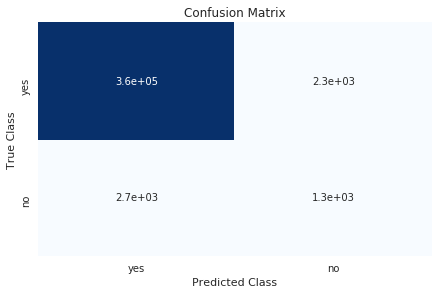

In [89]:
dataframe = pd.DataFrame(matrix,index=['yes','no'], columns=['yes','no'])
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"),plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [150]:
x.shape

(1110497, 44)

Here I will try XG Boost



In [153]:
from xgboost import XGBClassifier

In [154]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [155]:
print(model)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [156]:

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 99.09%


In [161]:
from sklearn.metrics import recall_score, precision_score, f1_score, cohen_kappa_score
print('Recall:{0:0.3f}'.format(recall_score(y_test,y_pred)))
print('Precision:{0:0.3f}'.format(precision_score(y_test,y_pred)))
print('f1:{0:0.3f}'.format(f1_score(y_test,y_pred)))
print('kappa:{0:0.3f}'.format(cohen_kappa_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

Recall:0.243
Precision:0.762
f1:0.368
kappa:0.365
[[373109    315]
 [  3139   1006]]


In [173]:
!gsutil cp ProjectML.ipynb gs://projectcsv/MyFirstModel.ipynb

CommandException: No URLs matched: ProjectML.ipynb
